In [2]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_table('survey-Data-From-User.txt')

In [14]:
data

,Date,Survey,SurveyResults
0,05-01-2023,7,Detractor
1,05-01-2023,10,Promoter
2,05-01-2023,5,Detractor
3,05-01-2023,9,Promoter
4,05-01-2023,9,Promoter
...,...,...,...
1454,05-01-2023,1,Detractor
1455,05-01-2023,10,Promoter
1456,05-01-2023,5,Detractor
1457,05-01-2023,9,Promoter


In [15]:
data.value_counts()

Date        Survey  SurveyResults
05-01-2023  9       Promoter         459
            10      Promoter         299
            7       Detractor        156
            1       Detractor        141
            5       Detractor        139
            4       Detractor        133
            8       Promoter         130
            910     Promoter           1
            1010    Promoter           1
Name: count, dtype: int64

array([[<Axes: title={'center': 'Survey'}>]], dtype=object)

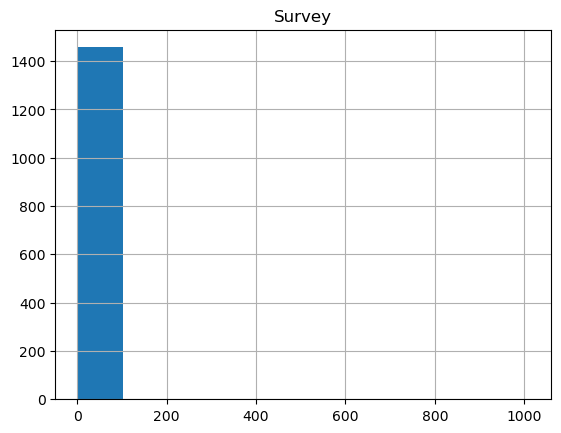

In [16]:
data.hist()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1459 non-null   object
 1   Survey         1459 non-null   int64 
 2   SurveyResults  1459 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [19]:
data.dropna(inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1459 non-null   object
 1   Survey         1459 non-null   int64 
 2   SurveyResults  1459 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Date'] = le.fit_transform(data['Date'])

In [32]:
pd.get_dummies(data['Date'],prefix='Date')

,Date_0
0,True
1,True
2,True
3,True
4,True
...,...
1454,True
1455,True
1456,True
1457,True


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SurveyResults'] = le.fit_transform(data['SurveyResults'])

In [34]:
pd.get_dummies(data['SurveyResults'],prefix='SurveyResults')

,SurveyResults_0,SurveyResults_1
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
1454,True,False
1455,False,True
1456,True,False
1457,False,True


In [35]:
data

,Date,Survey,SurveyResults
0,0,7,0
1,0,10,1
2,0,5,0
3,0,9,1
4,0,9,1
...,...,...,...
1454,0,1,0
1455,0,10,1
1456,0,5,0
1457,0,9,1


In [36]:
data.corr()

,Date,Survey,SurveyResults
Date,NaN,NaN,NaN
Survey,NaN,1.000000,0.096475
SurveyResults,NaN,0.096475,1.000000


In [37]:
x=data.drop(['Survey'],axis=1)
y=data['Survey']

In [38]:
x

,Date,SurveyResults
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
1454,0,0
1455,0,1
1456,0,0
1457,0,1


In [39]:
y

0        7
1       10
2        5
3        9
4        9
        ..
1454     1
1455    10
1456     5
1457     9
1458    10
Name: Survey, Length: 1459, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_train

,Date,SurveyResults
1379,0,1
176,0,1
1211,0,1
165,0,0
799,0,0
...,...,...
148,0,1
1448,0,0
1128,0,1
310,0,0


In [47]:
x_test

,Date,SurveyResults
204,0,1
425,0,1
902,0,1
188,0,1
222,0,0
...,...,...
33,0,0
452,0,0
1094,0,1
474,0,0


In [48]:
y_train

1379    10
176      9
1211    10
165      7
799      5
        ..
148      9
1448     7
1128     9
310      7
523      7
Name: Survey, Length: 1167, dtype: int64

In [49]:
y_test

204      9
425     10
902     10
188      8
222      7
        ..
33       1
452      5
1094     9
474      4
682      5
Name: Survey, Length: 292, dtype: int64

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [52]:
y_lr_train_pred

array([11.86600846, 11.86600846, 11.86600846, ..., 11.86600846,
        4.37991266,  4.37991266])

In [53]:
y_lr_test_pred

array([11.86600846, 11.86600846, 11.86600846, 11.86600846,  4.37991266,
       11.86600846,  4.37991266, 11.86600846, 11.86600846, 11.86600846,
       11.86600846, 11.86600846,  4.37991266,  4.37991266, 11.86600846,
        4.37991266,  4.37991266, 11.86600846, 11.86600846, 11.86600846,
       11.86600846,  4.37991266, 11.86600846, 11.86600846, 11.86600846,
       11.86600846,  4.37991266,  4.37991266, 11.86600846,  4.37991266,
       11.86600846,  4.37991266, 11.86600846,  4.37991266,  4.37991266,
       11.86600846,  4.37991266,  4.37991266,  4.37991266,  4.37991266,
       11.86600846, 11.86600846, 11.86600846,  4.37991266,  4.37991266,
        4.37991266, 11.86600846, 11.86600846, 11.86600846,  4.37991266,
        4.37991266,  4.37991266,  4.37991266,  4.37991266,  4.37991266,
       11.86600846,  4.37991266, 11.86600846,  4.37991266,  4.37991266,
       11.86600846, 11.86600846, 11.86600846, 11.86600846,  4.37991266,
        4.37991266,  4.37991266, 11.86600846, 11.86600846, 11.86

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [55]:
lr_train_mse

1551.4088826053608

In [56]:
lr_train_r2

0.008539450520561931

In [57]:
lr_test_mse

6.611674437391751

In [58]:
lr_test_r2

0.21429394442060645

In [59]:
lr_results=pd.DataFrame(['Linear Regression',lr_test_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()

In [60]:
lr_results.columns=['Methods','Training MSE','Training R2','Testing MSE','Testing R2']

In [61]:
lr_results

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,6.611674,0.008539,6.611674,0.214294


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [63]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [64]:
y_rf_train_pred

array([11.6701288 , 11.6701288 , 11.6701288 , ..., 11.6701288 ,
        4.36091617,  4.36091617])

In [65]:
y_rf_test_pred

array([11.6701288 , 11.6701288 , 11.6701288 , 11.6701288 ,  4.36091617,
       11.6701288 ,  4.36091617, 11.6701288 , 11.6701288 , 11.6701288 ,
       11.6701288 , 11.6701288 ,  4.36091617,  4.36091617, 11.6701288 ,
        4.36091617,  4.36091617, 11.6701288 , 11.6701288 , 11.6701288 ,
       11.6701288 ,  4.36091617, 11.6701288 , 11.6701288 , 11.6701288 ,
       11.6701288 ,  4.36091617,  4.36091617, 11.6701288 ,  4.36091617,
       11.6701288 ,  4.36091617, 11.6701288 ,  4.36091617,  4.36091617,
       11.6701288 ,  4.36091617,  4.36091617,  4.36091617,  4.36091617,
       11.6701288 , 11.6701288 , 11.6701288 ,  4.36091617,  4.36091617,
        4.36091617, 11.6701288 , 11.6701288 , 11.6701288 ,  4.36091617,
        4.36091617,  4.36091617,  4.36091617,  4.36091617,  4.36091617,
       11.6701288 ,  4.36091617, 11.6701288 ,  4.36091617,  4.36091617,
       11.6701288 , 11.6701288 , 11.6701288 , 11.6701288 ,  4.36091617,
        4.36091617,  4.36091617, 11.6701288 , 11.6701288 , 11.67

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [67]:
rf_results=pd.DataFrame(['Random Regression',rf_test_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Methods','Training MSE','Training R2','Testing MSE','Testing R2']

In [68]:
rf_results

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Regression,5.98776,0.008524,5.98776,0.288438


In [69]:
df_models=pd.concat([lr_results,rf_results],axis=0) #axis=1 column wise , axis=0 row wise

In [70]:
df_models

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,6.611674,0.008539,6.611674,0.214294
0,Random Regression,5.98776,0.008524,5.98776,0.288438


In [71]:
df_models.reset_index(drop=True)

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,6.611674,0.008539,6.611674,0.214294
1,Random Regression,5.98776,0.008524,5.98776,0.288438


Text(0.5, 0, 'Experiments')

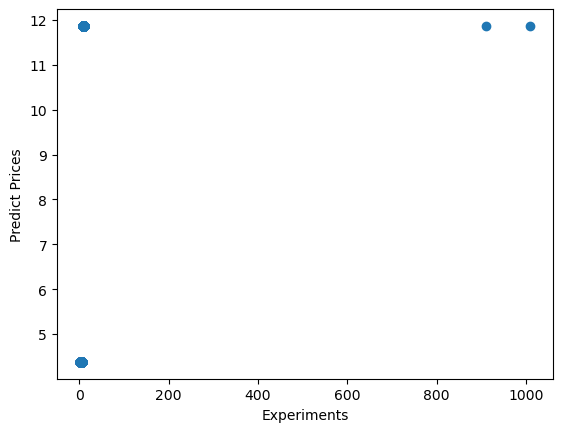

In [73]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train,y=y_lr_train_pred)
plt.ylabel("Predict Prices")
plt.xlabel("Experiments")

In [75]:
train_data=x_train.join(y_train)

In [76]:
train_data

,Date,SurveyResults,Survey
1379,0,1,10
176,0,1,9
1211,0,1,10
165,0,0,7
799,0,0,5
...,...,...,...
148,0,1,9
1448,0,0,7
1128,0,1,9
310,0,0,7


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'SurveyResults'}>],
       [<Axes: title={'center': 'Survey'}>, <Axes: >]], dtype=object)

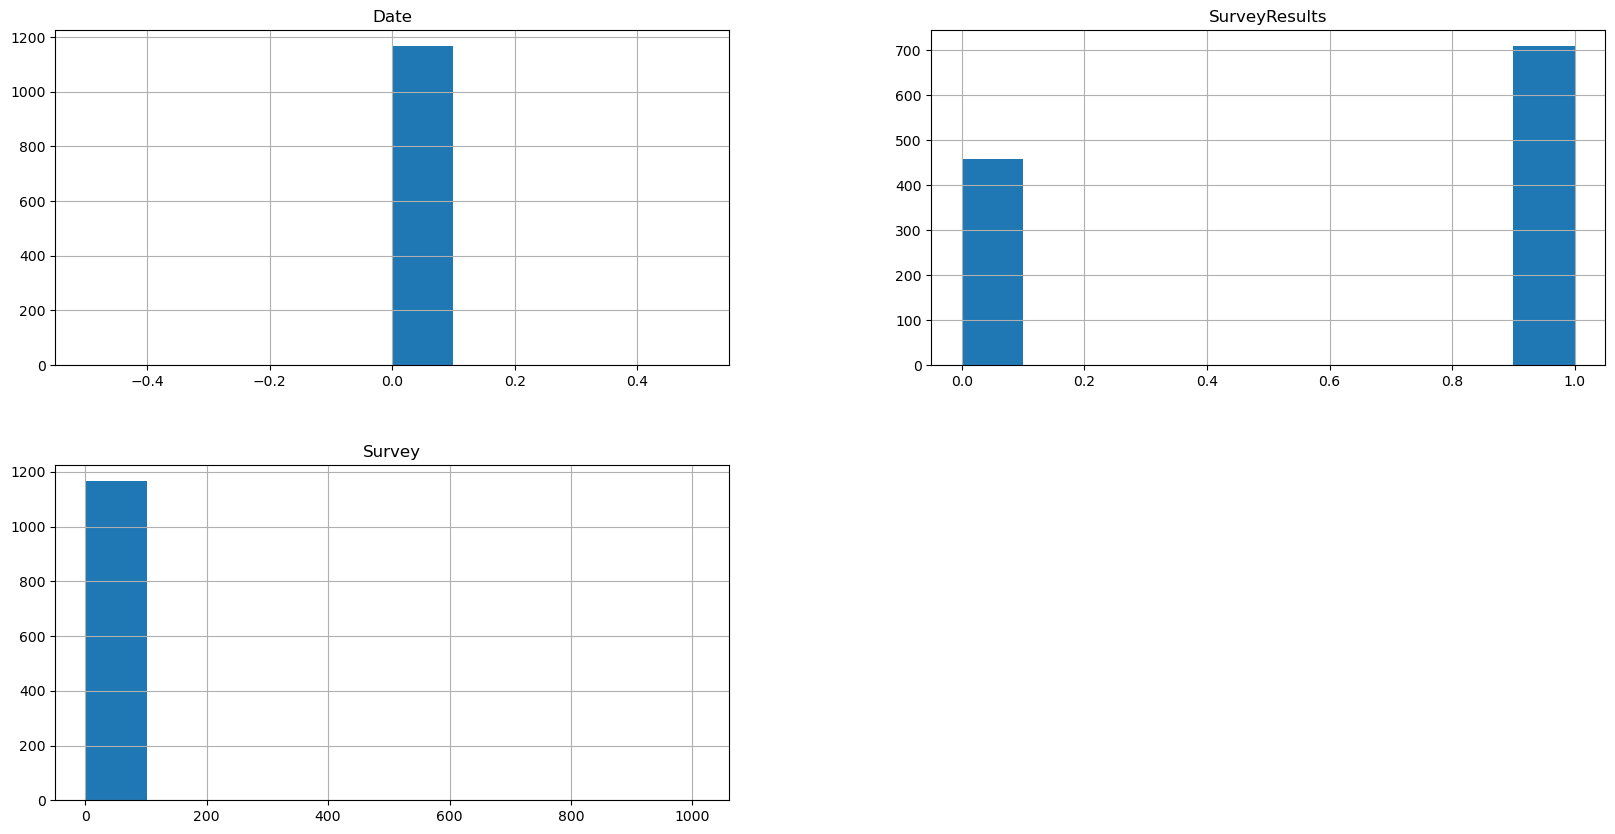

In [77]:
train_data.hist(figsize=[20,10])

<Axes: >

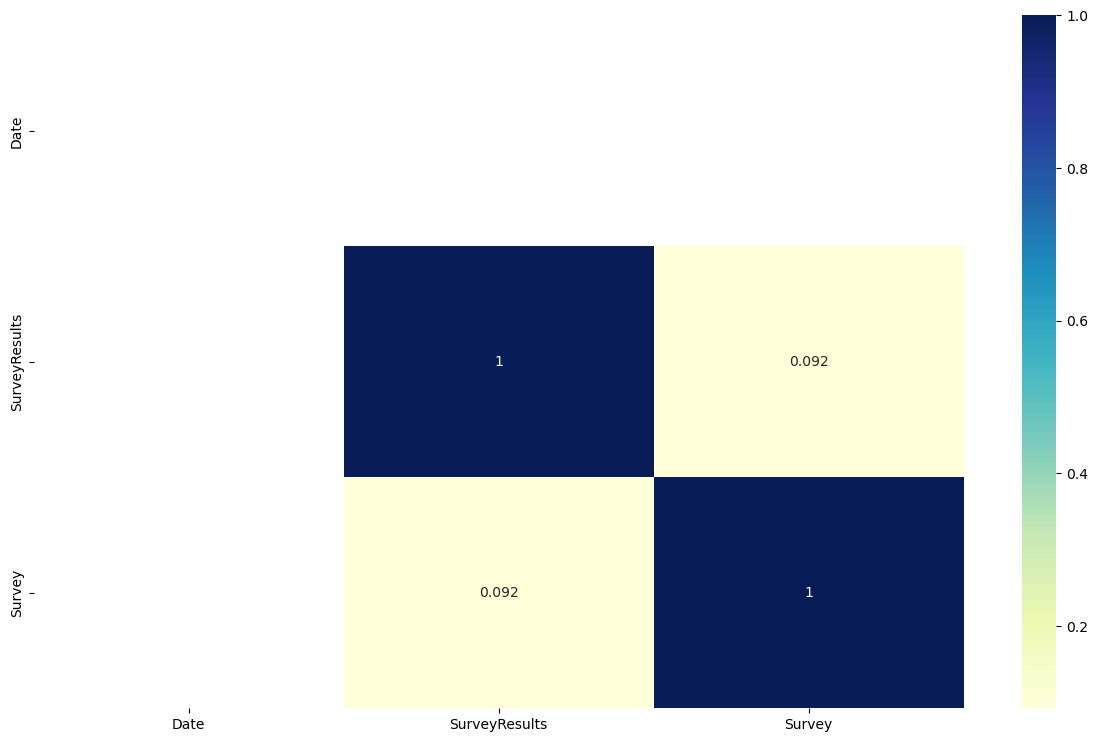

In [78]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [86]:
from collections import defaultdict


# Initialize dictionaries for high and low NPS counts
high_nps = defaultdict(lambda: 0)
low_nps = defaultdict(lambda: 0)

# Update dictionaries with counts for high (9-10) and low (0-6) scores
high_nps.update(dict(data[data['Survey'] >= 9].groupby('SurveyResults').count().reset_index()[['SurveyResults', 'Survey']].values))
low_nps.update(dict(data[data['Survey'] <= 6].groupby('SurveyResults').count().reset_index()[['SurveyResults', 'Survey']].values))

# Calculate total NPS counts for each council
total_nps = dict(data.groupby('SurveyResults').count().reset_index()[['SurveyResults', 'Survey']].values)

# Compute NPS score for each council
nps_score = {SurveyResults: (high_nps[SurveyResults] - low_nps[SurveyResults]) / float(total_nps[SurveyResults]) for SurveyResults in total_nps}

print(nps_score)


{0: -0.7258347978910369, 1: 0.8539325842696629}
